<a href="https://colab.research.google.com/github/siyuan221/ML656/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 6

- Use the same setup and the same split of the data as we did in Module 2, Assignment 4, and Assignment 5.
- Fit an artificial neural network to the data:\
    A single-layer network will suffice, but experiment a bit with the configuration;\
    but if you fit a multi-layer network, that will be great :-).
- Determine the confusion matrix for a 50% threshold for the test set.
- Produce an ROC curve using the test set for your classifiers. What is the AUCs?
- Compare the results to the classifiers we used in Module 2 and Assignment 4/5. Which performs best?

#### Import related modules and data
We first import the Wine data and split it the same way as in the WineData notebook. Since we want to get the prediction for "quality", we convert it to 1 or 0 by setting the threshold of 6. Quality > 6 will be considered as 1 which means high quality. Different from previous models, we use 0 or 1 instead of True or False to fit in neural network model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, roc_curve, auc
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
!git clone https://github.com/danielbauer1979/ML_656.git

fatal: destination path 'ML_656' already exists and is not an empty directory.


In [4]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))

In [5]:
wine = pd.read_csv('ML_656/winequality-red.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine['quality'] = wine['quality'].apply(lambda x: 1 if x > 6 else 0)
wine['quality'].describe()

count    1599.000000
mean        0.135710
std         0.342587
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: quality, dtype: float64

To fit our data into a neural network model, we also need to scale the data. For all the values except "quality" column, we scaled it and then add the "quality" column back to the data.

In [7]:
wine1 = wine.drop(columns = ['quality'])
wine_sc = scale(wine1)
wine_sc1 = pd.DataFrame(wine_sc, columns=wine1.columns)
wine_sc1['quality'] = wine['quality']

In [8]:
wine_sc1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,0
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,0


In [9]:
np.random.seed(43)
train, test = train_test_split(wine, test_size = 0.3)
X_train = train.drop(columns = ['quality']).values
y_train = train['quality'].values
X_test = test.drop(columns = ['quality']).values
y_test = test['quality'].values

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(wine.drop(columns=['quality']), \
#                                                     wine['quality'], test_size=0.3, random_state=43)


#### Fit to an artificial neural network

In [11]:
inputs = keras.Input(shape=(11,))
x = layers.Dense(6, activation="relu", name="dense_1")(inputs)
x = layers.Dense(5, activation="relu", name="dense_2")(x)
x = layers.Dense(4, activation="sigmoid", name="dense_3")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
credit_nnet = keras.Model(inputs=inputs, outputs=outputs)
credit_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [12]:
history = credit_nnet.fit(
  X_train,
  y_train,
  # batch_size=45,
  epochs=20
)

Epoch 1/20
35/35 [==============================] - 5s 11ms/step - loss: 1.7873 - accuracy: 0.1242
Epoch 2/20
35/35 [==============================] - 0s 9ms/step - loss: 1.1933 - accuracy: 0.1242
Epoch 3/20
35/35 [==============================] - 0s 8ms/step - loss: 0.9553 - accuracy: 0.1242
Epoch 4/20
35/35 [==============================] - 0s 6ms/step - loss: 0.8892 - accuracy: 0.1242
Epoch 5/20
35/35 [==============================] - 0s 6ms/step - loss: 0.8305 - accuracy: 0.1242
Epoch 6/20
35/35 [==============================] - 0s 4ms/step - loss: 0.7770 - accuracy: 0.1242
Epoch 7/20
35/35 [==============================] - 0s 7ms/step - loss: 0.7271 - accuracy: 0.1475
Epoch 8/20
35/35 [==============================] - 0s 7ms/step - loss: 0.6820 - accuracy: 0.6935
Epoch 9/20
35/35 [==============================] - 0s 8ms/step - loss: 0.6406 - accuracy: 0.8633
Epoch 10/20
35/35 [==============================] - 0s 7ms/step - loss: 0.6026 - accuracy: 0.8758
Epoch 11/20
35/35 

Next we determine a 50% confusion matrix for the text data. We can find the model is good at predicting correct False category for wine quality but really bad at other predictions.

In [13]:
mypreds = credit_nnet.predict(X_test)
mypreds_bin = mypreds > 0.5
table = pd.DataFrame({'True':y_test,'pred':mypreds_bin.T[0]})
table.groupby(['True','pred']).size().unstack('True')

15/15 [==============================] - 0s 3ms/step


True,0,1
pred,,
False,402,78


In [14]:
y_pred = credit_nnet.predict(X_test) > 0.5
cm = confusion_matrix(y_test, y_pred)
cm


15/15 [==============================] - 0s 4ms/step


array([[402,   0],
       [ 78,   0]])

Finally we produce the ROC curve for the test set. We can find the AUC score is 0.66, which is not a ideal prediction for the wine quality.

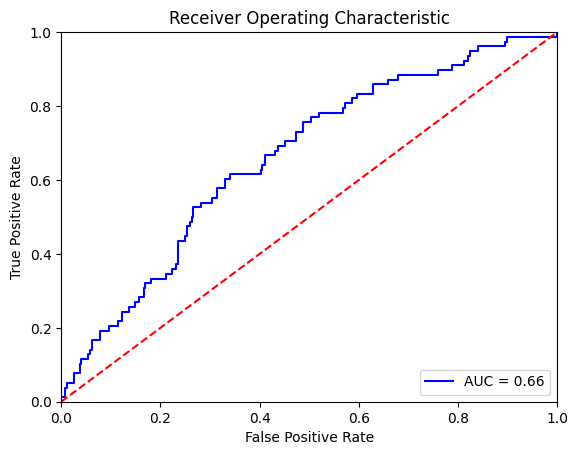

In [15]:
fpr, tpr, threshold = roc_curve(y_test, mypreds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Compare results to other models
AUC scores: \
- logistic regression: 0.92
- random forest: 0.91
- boosting: 0.90
- tree model: 0.72
- neural network: 0.66 \
We can find the neural network model has the least predicting performance among all the models. One possible reason is we haven't finding the optimized nn model to predicting the wine data. It also indicates that compare to other models, it is more time consuming to find the most effective nn model for relatively simple dataset like wine data.